Text(0.5, 1.0, 'ROC - TPR vs FPR')

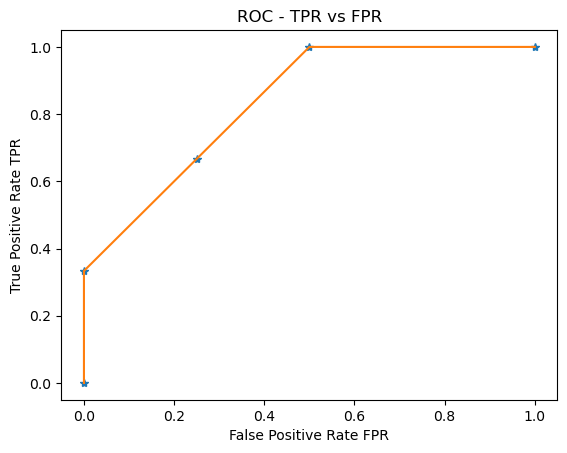

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = np.zeros(3)
x = np.zeros(3)
y = [0/6, 2/6, 4/6, 6/6, 6/6]
x = [0/4, 0/4, 1/4, 2/4, 4/4]
plt.plot(x,y,"*")
plt.plot(x,y)
plt.xlabel('False Positive Rate FPR')
plt.ylabel('True Positive Rate TPR')
plt.title('ROC - TPR vs FPR')


Text(0.5, 1.0, 'Decision Boundary Plot \n Green, Saffron : Grid test data \n violet, red : Training data')

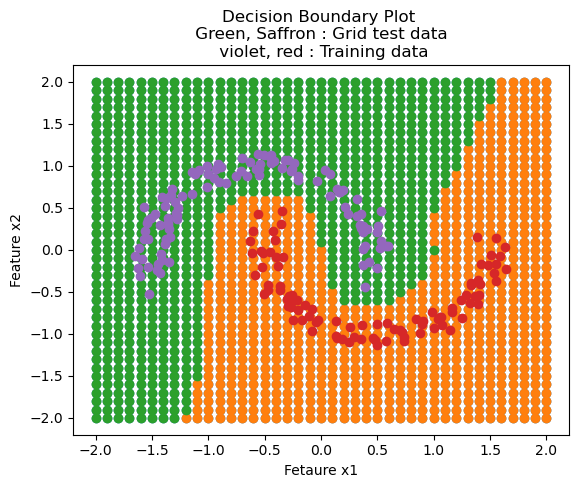

In [179]:
training_data=np.loadtxt("data/D2z.txt", delimiter=' ', dtype=None)
np.shape(training_data)
x1_test = np.linspace(-2, 2, 41);
x2_test = np.linspace(-2, 2, 41);
pred_data = np.zeros([41*41,3]);
dist = 500000;
pred_label = -1;
t_dist = np.zeros(1);
a = np.zeros([1,2]);
b = np.zeros([1,2]);
for i in range(41):
    for j in range(41):
        dist = 500000;
        pred_data[41*i+j, 0:2] = [x1_test[i], x2_test[j]];
        for index,t_data in enumerate(training_data):
            a = [pred_data[41*i+j, 0],   pred_data[41*i+j, 1]]
            b = [t_data[0], t_data[1]]
            t_dist = np.linalg.norm(np.array(a)-np.array(b));
            if(t_dist < dist):
                dist = t_dist
                pred_label = t_data[2];
        pred_data[41*(i)+j, 2]= pred_label;
plt.scatter(pred_data[:,0], pred_data[:,1])
data_sorted_y = pred_data[pred_data[:,2].argsort()]
y1_indx_start = np.argmax(data_sorted_y[:,2])
plt.scatter(data_sorted_y[:y1_indx_start,0],data_sorted_y[:y1_indx_start,1])
plt.scatter(data_sorted_y[y1_indx_start:,0],data_sorted_y[y1_indx_start:,1])
data_sorted_y = training_data[training_data[:,2].argsort()]
y1_indx_start = np.argmax(data_sorted_y[:,2])
plt.scatter(data_sorted_y[:y1_indx_start,0],data_sorted_y[:y1_indx_start,1])
plt.scatter(data_sorted_y[y1_indx_start:,0],data_sorted_y[y1_indx_start:,1])
plt.xlabel('Fetaure x1')
plt.ylabel('Feature x2')
plt.title('Decision Boundary Plot \n Green, Saffron : Grid test data \n violet, red : Training data')

In [181]:
df = pd.read_csv('data/emails.csv') #Directly loading csv in numpy giving string to int typecast issue
#training_data=np.loadtxt('data/emails.csv', dtype="None")
training_data = np.zeros([5000,3001]);
output_set = np.zeros([1000,3002]);
test_set = np.zeros([1000,3001]);
training_set = np.zeros([4000,3001]);
Recall = np.zeros([5,1])
Precision = np.zeros([5,1])
Accuracy = np.zeros([5,1])
Prob = np.zeros([1000]);

a = np.array(df.iloc[:,1])
for i in range(3001):
    training_data[:,i] = np.array(df.iloc[:,i+1])
np.shape(training_data)
distance = np.zeros(1);
euclid_distance = np.zeros(1);
def knn(test_set, training_set, output_set,k):
    k_neighbours_dist = np.zeros([4000,2]); # col 0: distance , col 1: label
    TP=0;
    TN=0;
    FN=0;
    FP=0;
    for index,test_elem in enumerate(test_set):
        distance = 500000;
        output_set[index, :3001] = test_elem;
        for index_train,train_elem in enumerate(training_set):
            euclid_distance = np.linalg.norm(np.array(train_elem[:3000])-np.array(test_elem[:3000]));
            k_neighbours_dist[index_train,0] = euclid_distance;
            k_neighbours_dist[index_train,1] = train_elem[3000]; # label
           # if(euclid_distance < distance):
            #    distance=euclid_distance;
             #   output_set[index, 3000]  = train_elem[3000];
        #all distances are computed. Now sort it.
        k_neighbours_dist = k_neighbours_dist[k_neighbours_dist[:,0].argsort()] # sorted by distances - index 0
        label_1_count = np.sum(k_neighbours_dist[:k,1]) # count all label 1 count
        label_0_count = k - label_1_count;
        if(label_1_count > label_0_count):
            output_set[index,3001] = label_1_count; 
            output_set[index, 3000]  = 1;
        else:
            output_set[index, 3000]  = 0;

        if((output_set[index, 3000] == 1) and (test_elem[3000]==1)):
            #print(TP);
            TP=TP+1;
        if((output_set[index, 3000] == 0) and (test_elem[3000]==0)):
            TN=TN+1;
        if((output_set[index, 3000] == 0) and (test_elem[3000]==1)):
            FN=FN+1;
        if((output_set[index, 3000] == 1) and (test_elem[3000]==0)):
            FP=FP+1;
    print("TP =", TP );
    print("TN =",TN);
    print("FP =", FP);
    print("FN =", FN);
    Recall = TP/(TP+FN);
    Precision = (TP)/(TP+FP);
    Accuracy = (TP+TN)/(TP+TN+FP+FN);
    print("Recall = ",Recall)
    print("Precision = ",Precision)
    print("Accuracy = ",Accuracy)
    return [Recall, Precision, Accuracy];
    
def do_5_fold_knn(k):
    #1 st fold
    print("1st Fold")
    test_set = training_data[:1000,:];
    training_set = training_data[1000:5000, :];
    [Recall[0], Precision[0], Accuracy[0]] = knn(test_set,training_set, output_set,k);
    print("2nd Fold")
    #2 nd fold
    test_set = training_data[1000:2000,:];
    training_set = np.vstack((training_data[0:1000, :], training_data[2000:5000, :]));
    [Recall[1], Precision[1], Accuracy[1]] = knn(test_set,training_set, output_set,k);
    #3rd  fold
    print("3rd Fold")
    test_set = training_data[2000:3000,:];
    training_set = np.vstack((training_data[0:2000, :], training_data[3000:5000, :]));
    [Recall[2], Precision[2], Accuracy[2]] = knn(test_set,training_set, output_set,k);
    #4 st fold
    print("4th Fold")
    test_set = training_data[3000:4000,:];
    training_set = np.vstack((training_data[0:3000, :], training_data[4000:5000, :]));
    [Recall[3], Precision[3], Accuracy[3]] = knn(test_set,training_set,output_set,k);
    #5 st fold
    print("5th Fold")
    test_set = training_data[4000:5000,:];
    training_set = training_data[:4000,:];
    [Recall[4], Precision[4], Accuracy[4]] = knn(test_set,training_set, output_set,k);
    
    
#Q2_2
do_5_fold_knn(1)

1st Fold
TP = 234
TN = 591
FP = 124
FN = 51
Recall =  0.8210526315789474
Precision =  0.6536312849162011
Accuracy =  0.825
2nd Fold
TP = 240
TN = 615
FP = 108
FN = 37
Recall =  0.8664259927797834
Precision =  0.6896551724137931
Accuracy =  0.855
3rd Fold
TP = 239
TN = 624
FP = 92
FN = 45
Recall =  0.8415492957746479
Precision =  0.7220543806646526
Accuracy =  0.863
4th Fold
TP = 241
TN = 613
FP = 93
FN = 53
Recall =  0.8197278911564626
Precision =  0.7215568862275449
Accuracy =  0.854
5th Fold
TP = 233
TN = 542
FP = 152
FN = 73
Recall =  0.761437908496732
Precision =  0.6051948051948052
Accuracy =  0.775


In [ ]:
#Q2_4
Recall = np.zeros([5,1])
Precision = np.zeros([5,1])
Accuracy = np.zeros([5,1])
Avg_Accuracy = np.zeros([5,1]);
Avg_Precision = np.zeros([5,1]);
Avg_Recall = np.zeros([5,1]);
do_5_fold_knn(1);
Avg_Accuracy[0] = np.mean(Accuracy);
Avg_Precision[0] = np.mean(Precision);
Avg_Recall[0] = np.mean(Recall);
do_5_fold_knn(3);
Avg_Accuracy[1] = np.mean(Accuracy);
Avg_Precision[1] = np.mean(Precision);
Avg_Recall[1] = np.mean(Recall);
do_5_fold_knn(5);
Avg_Accuracy[2] = np.mean(Accuracy);
Avg_Precision[2] = np.mean(Precision);
Avg_Recall[2] = np.mean(Recall);
do_5_fold_knn(7);
Avg_Accuracy[3] = np.mean(Accuracy);
Avg_Precision[3] = np.mean(Precision);
Avg_Recall[3] = np.mean(Recall);
do_5_fold_knn(10);
Avg_Accuracy[4] = np.mean(Accuracy);
Avg_Precision[4] = np.mean(Precision);
Avg_Recall[4] = np.mean(Recall);
plt.plot(Avg_Accuracy)
plt.plot(Avg_Accuracy)
plt.xlabel('K 5-Fold')
plt.ylabel('Average Accuracy')
plt.title('Average accuracy vs K')

1st Fold
TP = 234
TN = 591
FP = 124
FN = 51
Recall =  0.8210526315789474
Precision =  0.6536312849162011
Accuracy =  0.825
2nd Fold
TP = 240
TN = 615
FP = 108
FN = 37
Recall =  0.8664259927797834
Precision =  0.6896551724137931
Accuracy =  0.855
3rd Fold
TP = 239
TN = 624
FP = 92
FN = 45
Recall =  0.8415492957746479
Precision =  0.7220543806646526
Accuracy =  0.863
4th Fold
TP = 241
TN = 613
FP = 93
FN = 53
Recall =  0.8197278911564626
Precision =  0.7215568862275449
Accuracy =  0.854
5th Fold


In [184]:
#Q2_3
df = pd.read_csv('data/emails.csv') #Directly loading csv in numpy giving string to int typecast issue
#training_data=np.loadtxt('data/emails.csv', dtype="None")
training_data = np.zeros([5000,3001]);
output_set = np.zeros([1000,3002]);
test_set = np.zeros([1000,3001]);
training_set = np.zeros([4000,3001]);
Recall = np.zeros([5,1])
Precision = np.zeros([5,1])
Accuracy = np.zeros([5,1])
Prob = np.zeros([1000]);
a = np.array(df.iloc[:,1])
for i in range(3001):
    training_data[:,i] = np.array(df.iloc[:,i+1])
np.shape(training_data)
learning_rate = 0.005;
epochs = 200;
threshold = 0.5
batch_size = 16;
loss = np.zeros([4000*epochs,1])
#SGD gradient is used

def logistic_regression(test_set, training_set, output_set):
    gradient = np.zeros([3000]);
    #f_x_thetha = np.zeros(1);
    thetha=np.zeros([3000]);
    TP=0;
    TN=0;
    FN=0;
    FP=0;
    count=0;
    for iteration in range(epochs):
        for index_train,train_elem in enumerate(training_set):
            f_x_thetha = 1/(1+np.exp(-1*(np.dot(thetha[:3000],train_elem[0:3000]))))
            if(count==batch_size):
                thetha = thetha - learning_rate*gradient/batch_size;
                gradient = train_elem[0:3000]*(f_x_thetha-train_elem[3000]);
                count = 0;
            else:
                gradient = np.add(np.array(gradient),np.array(train_elem[0:3000]*(f_x_thetha-train_elem[3000])));
                count = count + 1;
            #print(train_elem)
            if(f_x_thetha==0):
                log_f_x_thetha1 = 0;
            else:
                log_f_x_thetha1 = np.log(f_x_thetha);
            if(f_x_thetha==1):
                log_f_x_thetha2 = 0;
            else:
                log_f_x_thetha2 = np.log(1-f_x_thetha);                
            loss[iteration*4000+index_train] = -train_elem[3000]*log_f_x_thetha1-(1-train_elem[3000])*log_f_x_thetha2;
                
    for index, test_elem in enumerate(test_set):
        f_x_thetha = 1/(1+np.exp(-1*(np.dot(thetha[:3000],test_elem[0:3000]))))
        output_set[index,3001] = f_x_thetha;
        if(f_x_thetha >= threshold):
            output_set[index,3000] = 1;
        else:
            output_set[index,3000] = 0;
        if((output_set[index, 3000] == 1) and (test_elem[3000]==1)):
            #print(TP);
            TP=TP+1;
        if((output_set[index, 3000] == 0) and (test_elem[3000]==0)):
            TN=TN+1;
        if((output_set[index, 3000] == 0) and (test_elem[3000]==1)):
            FN=FN+1;
        if((output_set[index, 3000] == 1) and (test_elem[3000]==0)):
            FP=FP+1;
    print("TP = ",TP);
    print("TN =",TN);
    print("FP =", FP);
    print("FN =",FN);
    Recall = TP/(TP+FN);
    Precision = (TP)/(TP+FP);
    Accuracy = (TP+TN)/(TP+TN+FP+FN);
    print("Recall = ",Recall)
    print("Precision = ",Precision)
    print("Accuracy = ",Accuracy)
    return [Recall, Precision, Accuracy];


#Normalization
test_set = training_data[:1000,:];
training_set = training_data[1000:5000, :];
training_data_scaled = (training_data -np.mean(training_data,axis=0))/np.std(training_data,axis=0)
#test_set_scaled = (test_set -np.mean(training_set,axis=0))/np.std(training_set,axis=0)
training_data_scaled[:,3000] = training_data[:,3000] # undo label normalization 
#test_set_scaled[:,3000] =0;
#logistic_regression(test_set_scaled, training_set_scaled, output_set);
#training_set_scaled
def do_5_fold_logistic_regression():
    training_data_scaled = (training_data -np.mean(training_data,axis=0))/np.std(training_data,axis=0)
    training_data_scaled[:,3000] = training_data[:,3000] # undo label normalization 
    #1 st fold
    print("1st Fold")
    test_set = training_data_scaled[:1000,:];
    training_set = training_data_scaled[1000:5000, :];
    [Recall[0], Precision[0], Accuracy[0]] = logistic_regression(test_set,training_set, output_set);
    #2 nd fold
    print("2nd Fold")
    test_set = training_data_scaled[1000:2000,:];
    training_set = np.vstack((training_data_scaled[0:1000, :], training_data_scaled[2000:5000, :]));
    [Recall[1], Precision[1], Accuracy[1]] = logistic_regression(test_set,training_set, output_set);
    #3rd  fold
    print("3rd Fold")
    test_set = training_data_scaled[2000:3000,:];
    training_set = np.vstack((training_data_scaled[0:2000, :], training_data_scaled[3000:5000, :]));
    [Recall[2], Precision[2], Accuracy[2]] = logistic_regression(test_set,training_set, output_set);
    #4 st fold
    print("4th Fold")
    test_set = training_data_scaled[3000:4000,:];
    training_set = np.vstack((training_data_scaled[0:3000, :], training_data_scaled[4000:5000, :]));
    [Recall[3], Precision[3], Accuracy[3]] = logistic_regression(test_set,training_set,output_set);
    #5 st fold
    print("5th Fold")
    test_set = training_data_scaled[4000:5000,:];
    training_set = training_data_scaled[:4000,:];
    [Recall[4], Precision[4], Accuracy[4]] = logistic_regression(test_set,training_set, output_set);
do_5_fold_logistic_regression();

1st Fold
TP =  279
TN = 663
FP = 52
FN = 6
Recall =  0.9789473684210527
Precision =  0.8429003021148036
Accuracy =  0.942
2nd Fold
TP =  273
TN = 669
FP = 54
FN = 4
Recall =  0.9855595667870036
Precision =  0.8348623853211009
Accuracy =  0.942
3rd Fold
TP =  275
TN = 681
FP = 35
FN = 9
Recall =  0.9683098591549296
Precision =  0.8870967741935484
Accuracy =  0.956
4th Fold
TP =  288
TN = 671
FP = 35
FN = 6
Recall =  0.9795918367346939
Precision =  0.891640866873065
Accuracy =  0.959
5th Fold
TP =  297
TN = 621
FP = 73
FN = 9
Recall =  0.9705882352941176
Precision =  0.8027027027027027
Accuracy =  0.918


Text(0.5, 1.0, 'Loss plot')

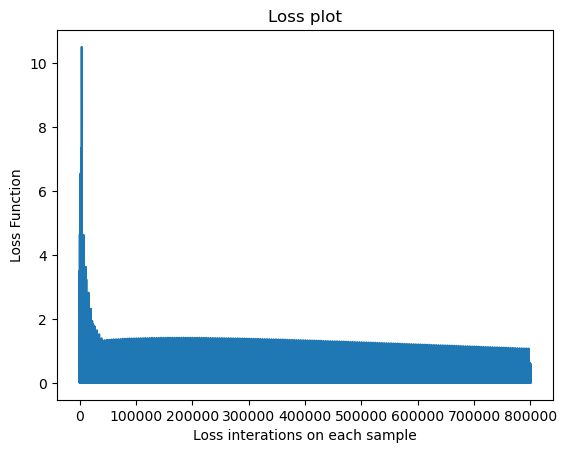

In [187]:
plt.plot(loss)
plt.xlabel('Loss interations on each sample')
plt.ylabel('Loss Function')
plt.title('Loss plot')

242
595
120
43
Recall =  0.8491228070175438
Precision =  0.6685082872928176
Accuracy =  0.837


TP = 242
TN = 595
FP = 120
FN = 43
Recall =  0.8491228070175438
Precision =  0.6685082872928176
Accuracy =  0.837


C:\Users\Patron\AppData\Local\Temp\ipykernel_25112\1204302363.py:34: RuntimeWarning: overflow encountered in exp
  f_x_thetha = 1/(1+np.exp(-1*(np.dot(thetha[:3000],train_elem[0:3000]))))


TP =  256
TN = 700
FP = 15
FN = 29
Recall =  0.8982456140350877
Precision =  0.9446494464944649
Accuracy =  0.956
271


C:\Users\Patron\AppData\Local\Temp\ipykernel_25112\1204302363.py:54: RuntimeWarning: overflow encountered in exp
  f_x_thetha = 1/(1+np.exp(-1*(np.dot(thetha[:3000],test_elem[0:3000]))))


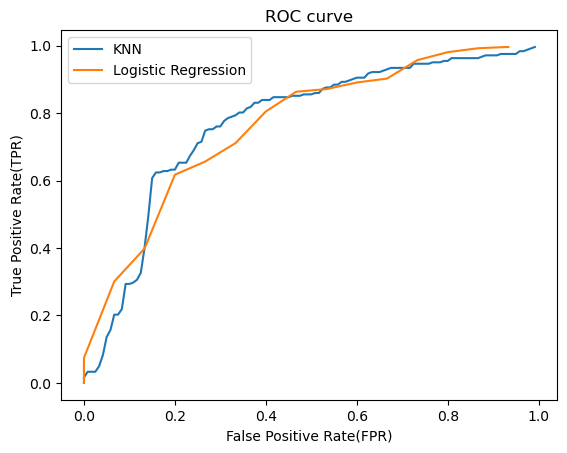

In [190]:
 #Q2_5
    #1 st fold -KNN
test_set = training_data[:1000,:];
training_set = training_data[1000:5000, :];
[Recall[0], Precision[0], Accuracy[0]] = knn(test_set,training_set, output_set,5);
roc_data = np.vstack((test_set[:,3000].T, output_set[:,3000].T, output_set[:,3001].T)).T
roc_sorted1 = roc_data[roc_data[:,1].argsort()]
roc_indx_start = np.argmax(roc_sorted1[:,1])
roc_sorted2 = roc_sorted1[roc_indx_start:]
roc_sorted3 = roc_sorted2[(-roc_sorted2[:,2]).argsort()]
num_positives = np.shape(roc_sorted3)[0]
TP = np.sum(roc_sorted3[:,0]) 
FP = num_positives - TP;
TPRk = np.zeros(num_positives);
FPRk = np.zeros(num_positives);
TPR_count =0;
FPR_count =0;
for i in range(num_positives):
    if(roc_sorted3[i,0]==0):
        TPRk[i]=TPR_count/TP;
        FPRk[i]=FPR_count/FP;
        FPR_count = FPR_count +1;
    else:
        TPRk[i] = TPRk[i-1];
        FPRk[i] = FPRk[i-1];
        TPR_count = TPR_count + 1;
 #1 st fold- Logistic REgression
test_set = training_data[:1000,:];
training_set = training_data[1000:5000, :];
[Recall[0], Precision[0], Accuracy[0]] = logistic_regression(test_set,training_set, output_set);
roc_data = np.vstack((test_set[:,3000].T, output_set[:,3000].T, output_set[:,3001].T)).T
roc_sorted1 = roc_data[roc_data[:,1].argsort()]
roc_indx_start = np.argmax(roc_sorted1[:,1])
roc_sorted2 = roc_sorted1[roc_indx_start:]
roc_sorted3 = roc_sorted2[(-roc_sorted2[:,2]).argsort()]
num_positives = np.shape(roc_sorted3)[0]
print(num_positives)
TP = np.sum(roc_sorted3[:,0]) 
FP = num_positives - TP;
TPRl = np.zeros(num_positives);
FPRl = np.zeros(num_positives);
TPR_count =0;
FPR_count =0;
for i in range(num_positives):
    if(roc_sorted3[i,0]==0):
        TPRl[i]=TPR_count/TP;
        FPRl[i]=FPR_count/FP;
        FPR_count = FPR_count +1;
    else:
        TPRl[i] = TPRl[i-1];
        FPRl[i] = FPRl[i-1];
        TPR_count = TPR_count + 1;
plt.plot(FPRk,TPRk)
plt.plot(FPRl,TPRl)
#np.shape(roc_sorted3)
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC curve')
plt.legend(['KNN','Logistic Regression'])